# Imports

In [201]:
import json
import sys
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

from s4hci.utils.data_handling import load_adi_data, save_as_fits
from s4hci.models.psf_subtraction import S4
from s4hci.models.noise import S4Noise

# Load the data

In [228]:
new_dataset_file = "/fast/mbonse/s4/30_data/HD22049_310_0100_C-0656_A_.hdf5"

In [229]:
science_data_new, raw_angles_new, psf_new = \
    load_adi_data(
        hdf5_dataset=new_dataset_file,
        data_tag="object", #object_raw
        psf_template_tag="psf_template",
        para_tag="header_object/PARANG")

In [230]:
science_data_old, raw_angles_old, psf_old = \
    load_adi_data(
        hdf5_dataset="/fast/mbonse/s4/30_data/old_datasets/HD22049_310_0100_C-0656_A_.hdf5",
        data_tag="13_object_final",
        psf_template_tag="10_psf",
        para_tag="header_13_object_final/PARANG")

In [231]:
#science_data_new = science_data_new[:, 76:-76, 76:-76]

In [232]:
science_data_new = science_data_new[:, 17:-17, 17:-17]

In [233]:
psf_template_data = np.median(psf_new, axis=0)
psf_template_data = psf_template_data - np.min(psf_template_data)

# Some plots with the data

In [234]:
science_data_new.shape

(60677, 107, 107)

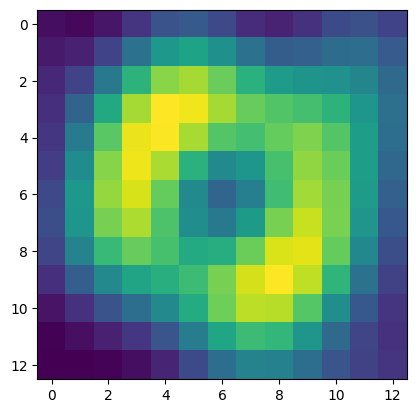

In [235]:
plt.imshow(np.mean(science_data_new, axis=0)[47:-47, 47:-47])

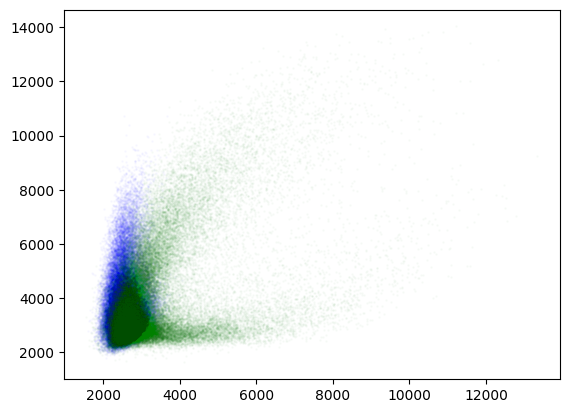

In [236]:
plt.scatter(science_data_new[:, 53,53], science_data_new[:, 52,54], s=1, alpha=0.02, color="blue")
plt.scatter(science_data_old[:, 53,53], science_data_old[:, 52,54], s=1, alpha=0.02, color="green")

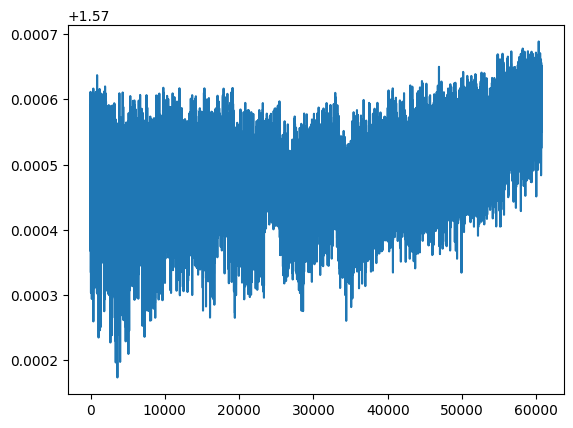

In [238]:
plt.plot(np.arctan(science_data_new[:, 53,52], science_data_new[:, 53,53]))

## Run some simple frame selection

In [290]:
def mse_frame_selection(dataset_in,
                        percent_cutoff):

    mean_frame = np.mean(dataset_in, axis=0)
    residual_sequence = (dataset_in - mean_frame)**2
    mse_sequence = np.mean(residual_sequence, axis=(1, 2))

    cutoff = int(len(mse_sequence) / 100 * percent_cutoff)
    remove_index = np.argsort(mse_sequence)[-cutoff:]
    
    return  np.delete(dataset_in, remove_index, axis=0)

In [296]:
science_data_new_clean_20 = mse_frame_selection(science_data_new, 20)
science_data_new_clean_50 = mse_frame_selection(science_data_new, 50)

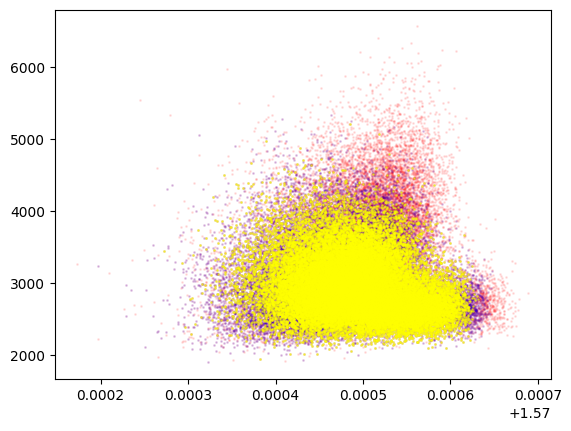

In [300]:
plt.scatter(science_data_new[:, 53,53], 
            science_data_new[:, 53,54], s=1, alpha=0.1, color="red")

plt.scatter(science_data_new_clean_20[:, 53,53], 
            science_data_new_clean_20[:, 53,54], s=1, alpha=0.1, color="blue")

plt.scatter(science_data_new_clean_50[:, 53,53], 
            science_data_new_clean_50[:, 53,54], s=1, alpha=0.5, color="yellow")